In [2]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

print(torch.__version__)

1.2.0+cu92


一维梯度下降

In [4]:
def f(x):
    return x**2  # Objective function

def gradf(x):
    return 2 * x  # Its derivative

def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


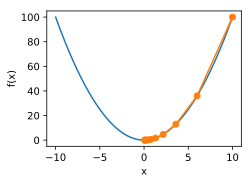

In [6]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = np.arange(-n, n, 0.01)
    d2l.set_figsize((3.5, 2.5))
    d2l.plt.plot(f_line, [f(x) for x in f_line],'-')
    d2l.plt.plot(res, [f(x) for x in res],'-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')
    

show_trace(res)

学习率改变的影响

epoch 10, x: 3.4867844009999995


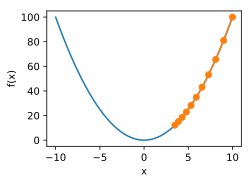

In [8]:
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


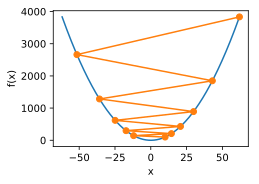

In [9]:
show_trace(gd(1.1))

局部极小值

epoch 10, x: -1.5281659276350823


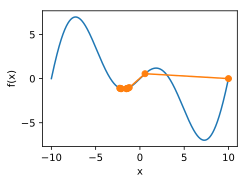

In [11]:
c = 0.15 * np.pi

def f(x):
    return x * np.cos(c * x)

def gradf(x):
    return np.cos(c * x) - c * x * np.sin(c * x)

show_trace(gd(2))

In [12]:
def train_2d(trainer, steps=20):
    x1, x2 = -5, -2
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2 = trainer(x1, x2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results): 
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')


epoch 20, x1 -0.057646, x2 -0.000073


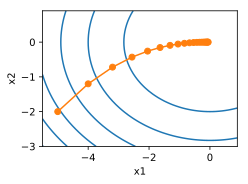

In [13]:
eta = 0.1

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2)

show_trace_2d(f_2d, train_2d(gd_2d))

自适应方法

牛顿法

epoch 10, x: 0.0


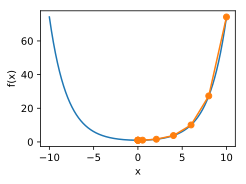

In [14]:
c = 0.5

def f(x):
    return np.cosh(c * x)  # Objective

def gradf(x):
    return c * np.sinh(c * x)  # Derivative

def hessf(x):
    return c**2 * np.cosh(c * x)  # Hessian

# Hide learning rate for now
def newton(eta=1):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x) / hessf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

show_trace(newton())

epoch 10, x: 26.83413291324767


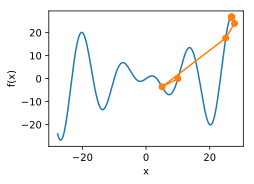

In [15]:
c = 0.15 * np.pi

def f(x):
    return x * np.cos(c * x)

def gradf(x):
    return np.cos(c * x) - c * x * np.sin(c * x)

def hessf(x):
    return - 2 * c * np.sin(c * x) - x * c**2 * np.cos(c * x)

show_trace(newton())

epoch 10, x: 7.269860168684531


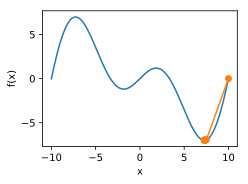

In [16]:
show_trace(newton(0.5))